# Testing Shap Values

# Preliminaries

In [1]:
import shap
from mercs import Mercs
import numpy as np
import pandas as pd

# Setup

(800, 8)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.

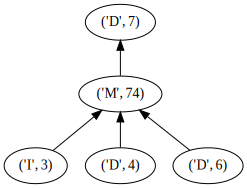

In [12]:
from mercs.tests.setup import RANDOM_STATE, default_dataset

train, test = default_dataset()
print(train.shape)

q_code = np.array([-1, -1, -1, -1, 0, 0, 0, 1])
m_basic = Mercs(
    random_state=RANDOM_STATE,
    prediction_algorithm="it",
    selection_algorithm="random",
    stepsize=0.4,
    nb_iterations=10,
    fraction_missing=0.4,
    max_depth=4,
    normalize_per_attribtue=True,
    calculation_method_feature_importances="shap",
)

m_basic.fit(train, nominal_attributes={7})
y_pred_01 = m_basic.predict(test, q_code=q_code)
m_basic.show_q_diagram(index=0)

In [3]:
dt = m_basic.m_list[0].model
desc_ids, targ_ids = m_basic.m_list[0].desc_ids, m_basic.m_list[0].targ_ids

In [15]:
m_basic.m_score

array([[0.        , 0.        , 0.        , 0.04306394, 0.        ,
        0.        , 0.        , 0.        ],
       [0.08320958, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.45639906, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02184236, 0.        , 0.        ],
       [0.        , 0.06723297, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08313999, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.04123168,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05633458, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05182536,
        0.        , 0.      

In [5]:
m_basic.m_list[0].feature_importances_

array([0.22226958, 0.15259644, 0.62513398])

In [ ]:
np.squeeze(normalize(fimps.reshape(1,-1), norm='l1'))

In [ ]:
def _calculate_shap_values(model, X):
    shap_values = shap.TreeExplainer(model).shap_values(X)
    avgs_values = np.mean(np.abs(shap_values), axis=0)
    return np.squeeze(normalize(avgs_values.reshape(1,-1), norm='l1'))

In [ ]:
_calculate_shap_values(dt, train[:, desc_ids])